In [252]:
import pandas as pd
import numpy as np
import itertools

In [253]:
pd.set_option('display.max_columns', None)

In [254]:
df = pd.read_csv('data/deadlock_matches_28k.csv')
df

,matchid,winner,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6300004,The Amber Hand,Haze,McGinnis,Lash,Bebop,Wraith,Lady Geist,Seven,Vindicta,Grey Talon,Infernus,Pocket,Warden
1,6300005,The Sapphire Flame,Yamato,Kelvin,Vindicta,Infernus,Shiv,Bebop,Seven,Wraith,Pocket,Mo & Krill,Abrams,Paradox
2,6300007,The Amber Hand,Lady Geist,Kelvin,Infernus,Pocket,Warden,Haze,Paradox,Ivy,Seven,Viscous,Abrams,Shiv
3,6300008,The Sapphire Flame,Warden,Abrams,Dynamo,Haze,Viscous,Shiv,Bebop,McGinnis,Grey Talon,Vindicta,Wraith,Seven
4,6300009,The Sapphire Flame,Ivy,Kelvin,Grey Talon,Mo & Krill,Pocket,Wraith,Viscous,Shiv,Vindicta,Haze,Seven,Infernus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,5819994,The Amber Hand,Infernus,Shiv,Mo & Krill,Warden,Bebop,Haze,Wraith,Vindicta,Seven,Dynamo,Grey Talon,Lady Geist
28674,5819996,The Sapphire Flame,Vindicta,Kelvin,Dynamo,Haze,Warden,Wraith,Viscous,Pocket,Seven,Infernus,Grey Talon,Paradox
28675,5819997,The Sapphire Flame,Lash,Bebop,Haze,Pocket,McGinnis,Dynamo,Lady Geist,Abrams,Warden,Seven,Wraith,Vindicta
28676,5819998,The Sapphire Flame,Grey Talon,Viscous,Abrams,Lash,Lady Geist,Haze,Vindicta,Kelvin,Bebop,Infernus,Ivy,Dynamo


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   matchid   28678 non-null  int64 
 1   winner    28678 non-null  object
 2   hero_1_A  28678 non-null  object
 3   hero_2_A  28678 non-null  object
 4   hero_3_A  28678 non-null  object
 5   hero_4_A  28678 non-null  object
 6   hero_5_A  28678 non-null  object
 7   hero_6_A  28678 non-null  object
 8   hero_1_B  28678 non-null  object
 9   hero_2_B  28678 non-null  object
 10  hero_3_B  28678 non-null  object
 11  hero_4_B  28678 non-null  object
 12  hero_5_B  28678 non-null  object
 13  hero_6_B  28678 non-null  object
dtypes: int64(1), object(13)
memory usage: 3.1+ MB


In [256]:
df.duplicated().sum()

0

In [257]:
df['winner'] = df['winner'].apply(lambda x: 0 if x == 'The Amber Hand' else 1)
for ch in ('A', 'B'):
    for i in range(1, 7):
        df[f'hero_{i}_{ch}'] = df[f'hero_{i}_{ch}'].str.lower()
df

,matchid,winner,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6300004,0,haze,mcginnis,lash,bebop,wraith,lady geist,seven,vindicta,grey talon,infernus,pocket,warden
1,6300005,1,yamato,kelvin,vindicta,infernus,shiv,bebop,seven,wraith,pocket,mo & krill,abrams,paradox
2,6300007,0,lady geist,kelvin,infernus,pocket,warden,haze,paradox,ivy,seven,viscous,abrams,shiv
3,6300008,1,warden,abrams,dynamo,haze,viscous,shiv,bebop,mcginnis,grey talon,vindicta,wraith,seven
4,6300009,1,ivy,kelvin,grey talon,mo & krill,pocket,wraith,viscous,shiv,vindicta,haze,seven,infernus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,5819994,0,infernus,shiv,mo & krill,warden,bebop,haze,wraith,vindicta,seven,dynamo,grey talon,lady geist
28674,5819996,1,vindicta,kelvin,dynamo,haze,warden,wraith,viscous,pocket,seven,infernus,grey talon,paradox
28675,5819997,1,lash,bebop,haze,pocket,mcginnis,dynamo,lady geist,abrams,warden,seven,wraith,vindicta
28676,5819998,1,grey talon,viscous,abrams,lash,lady geist,haze,vindicta,kelvin,bebop,infernus,ivy,dynamo


In [258]:
heroes = pd.read_csv('data/heroes_stats.csv')['localized_name']
duo_winrate = {}
for i in itertools.combinations(heroes, 2):
    duo_winrate[i] = {'win': 0, 'total': 0}

In [259]:
A_team = ['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']
B_team = ['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']

df['A'] = df[A_team].values.tolist()
df['B'] = df[B_team].values.tolist()

for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df

,matchid,winner,A,B
0,6300004,0,"[haze, mcginnis, lash, bebop, wraith, lady geist]","[seven, vindicta, grey talon, infernus, pocket..."
1,6300005,1,"[yamato, kelvin, vindicta, infernus, shiv, bebop]","[seven, wraith, pocket, mo & krill, abrams, pa..."
2,6300007,0,"[lady geist, kelvin, infernus, pocket, warden,...","[paradox, ivy, seven, viscous, abrams, shiv]"
3,6300008,1,"[warden, abrams, dynamo, haze, viscous, shiv]","[bebop, mcginnis, grey talon, vindicta, wraith..."
4,6300009,1,"[ivy, kelvin, grey talon, mo & krill, pocket, ...","[viscous, shiv, vindicta, haze, seven, infernus]"
...,...,...,...,...
28673,5819994,0,"[infernus, shiv, mo & krill, warden, bebop, haze]","[wraith, vindicta, seven, dynamo, grey talon, ..."
28674,5819996,1,"[vindicta, kelvin, dynamo, haze, warden, wraith]","[viscous, pocket, seven, infernus, grey talon,..."
28675,5819997,1,"[lash, bebop, haze, pocket, mcginnis, dynamo]","[lady geist, abrams, warden, seven, wraith, vi..."
28676,5819998,1,"[grey talon, viscous, abrams, lash, lady geist...","[vindicta, kelvin, bebop, infernus, ivy, dynamo]"


In [260]:
A_win = df[df['winner'] == 0]
B_win = df[df['winner'] == 1]

for i in duo_winrate:
    count = 0
    for j in A_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count

    count = 0
    for j in A_win['B']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['total'] += count

for i in duo_winrate:
    count = 0
    for j in B_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['total'] += count

    count = 0
    for j in B_win['B']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count

In [261]:
# save duo_winrate in txt file
# open('data/duo_winrate.txt', 'w').write(str(duo_winrate))

11081

In [262]:
duo_winrate_df = pd.DataFrame.from_dict(duo_winrate).T
duo_winrate_df['winrate'] = duo_winrate_df['win'] / duo_winrate_df['total']
duo_winrate_df = duo_winrate_df.sort_values(by=['winrate'], ascending=False)
duo_winrate_df

,,win,total,winrate
haze,seven,6910,10921,0.632726
mcginnis,seven,4760,7563,0.629380
seven,warden,3704,5898,0.628009
mo & krill,seven,2534,4039,0.627383
kelvin,seven,3412,5522,0.617892
...,...,...,...,...
dynamo,paradox,1151,2825,0.407434
grey talon,paradox,1577,3879,0.406548
dynamo,vindicta,1872,4660,0.401717
grey talon,vindicta,2675,6753,0.396120


In [263]:
def synergy(column):
    duo_winrate = ''
    for string in open('data/duo_winrate.txt', 'r').readlines():
        duo_winrate = string
    duo_winrate = eval(duo_winrate)
    column.sort()
    synergy = 0
    for pair in itertools.combinations(column, 2):
        try:
            synergy += (duo_winrate[pair]['win'] / duo_winrate[pair]['total'])
        except:
            synergy += (duo_winrate[pair[1], pair[0]]['win'] / duo_winrate[pair[1], pair[0]]['total'])
    return synergy

df['A_synergy'] = df['A'].apply(synergy)
df['B_synergy'] = df['B'].apply(synergy)
df

,matchid,winner,A,B,A_synergy,B_synergy
0,6300004,0,"[bebop, haze, lady geist, lash, mcginnis, wraith]","[grey talon, infernus, pocket, seven, vindicta...",7.763484,7.438769
1,6300005,1,"[bebop, infernus, kelvin, shiv, vindicta, yamato]","[abrams, mo & krill, paradox, pocket, seven, w...",6.959280,7.727765
2,6300007,0,"[haze, infernus, kelvin, lady geist, pocket, w...","[abrams, ivy, paradox, seven, shiv, viscous]",7.787809,7.577359
3,6300008,1,"[abrams, dynamo, haze, shiv, viscous, warden]","[bebop, grey talon, mcginnis, seven, vindicta,...",7.460972,7.502869
4,6300009,1,"[grey talon, ivy, kelvin, mo & krill, pocket, ...","[haze, infernus, seven, shiv, vindicta, viscous]",7.292404,7.573124
...,...,...,...,...,...,...
28673,5819994,0,"[bebop, haze, infernus, mo & krill, shiv, warden]","[dynamo, grey talon, lady geist, seven, vindic...",7.593156,7.342302
28674,5819996,1,"[dynamo, haze, kelvin, vindicta, warden, wraith]","[grey talon, infernus, paradox, pocket, seven,...",7.336437,7.335398
28675,5819997,1,"[bebop, dynamo, haze, lash, mcginnis, pocket]","[abrams, lady geist, seven, vindicta, warden, ...",7.429533,7.896368
28676,5819998,1,"[abrams, grey talon, haze, lady geist, lash, v...","[bebop, dynamo, infernus, ivy, kelvin, vindicta]",7.534629,6.956887


In [264]:
df[A_team] = df['A'].tolist()
df[B_team] = df['B'].tolist()
df.drop(['A', 'B'], axis=1, inplace=True)
df

,matchid,winner,A_synergy,B_synergy,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6300004,0,7.763484,7.438769,bebop,haze,lady geist,lash,mcginnis,wraith,grey talon,infernus,pocket,seven,vindicta,warden
1,6300005,1,6.959280,7.727765,bebop,infernus,kelvin,shiv,vindicta,yamato,abrams,mo & krill,paradox,pocket,seven,wraith
2,6300007,0,7.787809,7.577359,haze,infernus,kelvin,lady geist,pocket,warden,abrams,ivy,paradox,seven,shiv,viscous
3,6300008,1,7.460972,7.502869,abrams,dynamo,haze,shiv,viscous,warden,bebop,grey talon,mcginnis,seven,vindicta,wraith
4,6300009,1,7.292404,7.573124,grey talon,ivy,kelvin,mo & krill,pocket,wraith,haze,infernus,seven,shiv,vindicta,viscous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,5819994,0,7.593156,7.342302,bebop,haze,infernus,mo & krill,shiv,warden,dynamo,grey talon,lady geist,seven,vindicta,wraith
28674,5819996,1,7.336437,7.335398,dynamo,haze,kelvin,vindicta,warden,wraith,grey talon,infernus,paradox,pocket,seven,viscous
28675,5819997,1,7.429533,7.896368,bebop,dynamo,haze,lash,mcginnis,pocket,abrams,lady geist,seven,vindicta,warden,wraith
28676,5819998,1,7.534629,6.956887,abrams,grey talon,haze,lady geist,lash,viscous,bebop,dynamo,infernus,ivy,kelvin,vindicta


In [265]:
for hero in heroes:
    df[hero] = 0
    df[hero] -= (df[A_team] == hero).any(axis=1)
    df[hero] += (df[B_team] == hero).any(axis=1)

for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df

,matchid,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato
0,6300004,0,7.763484,7.438769,0,-1,0,1,-1,1,0,0,-1,-1,-1,0,0,1,1,0,1,0,1,-1,0
1,6300005,1,6.959280,7.727765,1,-1,0,0,0,-1,0,-1,0,0,0,1,1,1,1,-1,-1,0,0,1,-1
2,6300007,0,7.787809,7.577359,1,0,0,0,-1,-1,1,-1,-1,0,0,0,1,-1,1,1,0,1,-1,0,0
3,6300008,1,7.460972,7.502869,-1,1,-1,1,-1,0,0,0,0,0,1,0,0,0,1,-1,1,-1,-1,1,0
4,6300009,1,7.292404,7.573124,0,0,0,-1,1,1,-1,-1,0,0,0,-1,0,-1,1,1,1,1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,5819994,0,7.593156,7.342302,0,-1,1,1,-1,-1,0,0,1,0,0,-1,0,0,1,-1,1,0,-1,1,0
28674,5819996,1,7.336437,7.335398,0,0,-1,1,-1,1,0,-1,0,0,0,0,1,1,1,0,-1,1,-1,-1,0
28675,5819997,1,7.429533,7.896368,1,-1,-1,0,-1,0,0,0,1,-1,-1,0,0,-1,1,0,1,0,1,1,0
28676,5819998,1,7.534629,6.956887,-1,1,1,-1,-1,1,1,1,-1,-1,0,0,0,0,0,0,1,-1,0,0,0


In [266]:
def add_heroes_attributes(df):
    heroes_stats_df = pd.read_csv('data/heroes_stats.csv')
    heroes_list = heroes_stats_df['localized_name']
    d = {k: v for k, v in zip(heroes_list, heroes_stats_df.index)}

    for ch in ('A', 'B'):
        for col in heroes_stats_df.columns[1:]:
            df[f'{ch}_total_{col}'] = 0.

    for hero in heroes_list:
        df.loc[df[f'{hero}'] == -1, f'A_total_dps':f'A_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values.astype(float)
        df.loc[df[f'{hero}'] == 1, f'B_total_dps':f'B_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values.astype(float)
    return df
add_heroes_attributes(df)

,matchid,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,6300004,0,7.763484,7.438769,0,-1,0,1,-1,1,0,0,-1,-1,-1,0,0,1,1,0,1,0,1,-1,0,388.0,58.55,251.0,54.44,378.0,696.0,3450.0,12.0,10.0,40.0,40.7,5.0,17.0,413.0,78.90,123.0,29.88,378.0,696.0,3375.0,11.5,-2.0,-15.0,40.5,0.0,17.0
1,6300005,1,6.959280,7.727765,1,-1,0,0,0,-1,0,-1,0,0,0,1,1,1,1,-1,-1,0,0,1,-1,418.0,58.25,152.0,36.16,384.0,708.0,3525.0,13.0,0.0,10.0,42.2,3.0,17.0,397.0,37.48,161.0,34.39,378.0,696.0,3500.0,11.5,8.0,-15.0,41.8,0.0,18.0
2,6300007,0,7.787809,7.577359,1,0,0,0,-1,-1,1,-1,-1,0,0,0,1,-1,1,1,0,1,-1,0,0,409.0,83.00,108.0,32.22,378.0,696.0,3475.0,11.0,0.0,-5.0,40.0,1.0,18.0,384.0,47.58,141.0,36.93,378.0,696.0,3400.0,10.5,8.0,0.0,41.0,0.0,19.0
3,6300008,1,7.460972,7.502869,-1,1,-1,1,-1,0,0,0,0,0,1,0,0,0,1,-1,1,-1,-1,1,0,380.0,62.78,99.0,26.57,378.0,696.0,3450.0,11.0,0.0,0.0,41.0,0.0,18.0,414.0,65.45,252.0,49.98,378.0,696.0,3400.0,12.5,8.0,25.0,40.7,3.0,16.0
4,6300009,1,7.292404,7.573124,0,0,0,-1,1,1,-1,-1,0,0,0,-1,0,-1,1,1,1,1,0,-1,0,409.0,61.60,148.0,39.46,378.0,696.0,3500.0,13.0,0.0,-5.0,41.3,0.0,19.0,395.0,57.40,133.0,38.28,378.0,696.0,3375.0,11.5,-2.0,0.0,43.5,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,5819994,0,7.593156,7.342302,0,-1,1,1,-1,-1,0,0,1,0,0,-1,0,0,1,-1,1,0,-1,1,0,403.0,46.60,165.0,43.96,378.0,696.0,3625.0,14.0,10.0,0.0,41.5,3.0,18.0,366.0,91.00,151.0,31.20,378.0,696.0,3500.0,10.5,-2.0,0.0,40.5,1.0,17.0
28674,5819996,1,7.336437,7.335398,0,0,-1,1,-1,1,0,-1,0,0,0,0,1,1,1,0,-1,1,-1,-1,0,404.0,78.90,149.0,38.36,378.0,696.0,3400.0,12.0,-10.0,10.0,42.0,0.0,17.0,388.0,66.30,144.0,33.56,378.0,696.0,3375.0,11.5,8.0,-15.0,40.0,0.0,18.0
28675,5819997,1,7.429533,7.896368,1,-1,-1,0,-1,0,0,0,1,-1,-1,0,0,-1,1,0,1,0,1,1,0,394.0,46.05,215.0,47.12,378.0,696.0,3450.0,13.0,10.0,25.0,41.2,4.0,17.0,401.0,80.48,142.0,30.37,378.0,696.0,3450.0,9.5,-2.0,0.0,40.5,1.0,17.0
28676,5819998,1,7.534629,6.956887,-1,1,1,-1,-1,1,1,1,-1,-1,0,0,0,0,0,0,1,-1,0,0,0,360.0,81.28,113.0,27.51,378.0,696.0,3400.0,10.0,0.0,15.0,40.5,2.0,18.0,404.0,64.40,181.0,50.06,378.0,696.0,3625.0,13.0,0.0,10.0,40.7,3.0,18.0


In [267]:
df['winner'].value_counts()

winner
1    14484
0    14194
Name: count, dtype: int64

In [268]:
df.columns

Index(['matchid', 'winner', 'A_synergy', 'B_synergy', 'abrams', 'bebop',
       'dynamo', 'grey talon', 'haze', 'infernus', 'ivy', 'kelvin',
       'lady geist', 'lash', 'mcginnis', 'mo & krill', 'paradox', 'pocket',
       'seven', 'shiv', 'vindicta', 'viscous', 'warden', 'wraith', 'yamato',
       'A_total_dps', 'A_total_bullet_damage', 'A_total_ammo', 'A_total_bps',
       'A_total_light_melee', 'A_total_heavy_melee', 'A_total_max_health',
       'A_total_health_regen', 'A_total_bullet_resist',
       'A_total_spirit_resist', 'A_total_move_speed', 'A_total_sprint_speed',
       'A_total_stamina', 'B_total_dps', 'B_total_bullet_damage',
       'B_total_ammo', 'B_total_bps', 'B_total_light_melee',
       'B_total_heavy_melee', 'B_total_max_health', 'B_total_health_regen',
       'B_total_bullet_resist', 'B_total_spirit_resist', 'B_total_move_speed',
       'B_total_sprint_speed', 'B_total_stamina'],
      dtype='object')

In [269]:
display(df.isna().sum().sum(), df.duplicated().sum())

0

0

In [270]:
df.drop('matchid', axis=1, inplace=True)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   winner                 28678 non-null  int64  
 1   A_synergy              28678 non-null  float64
 2   B_synergy              28678 non-null  float64
 3   abrams                 28678 non-null  int64  
 4   bebop                  28678 non-null  int64  
 5   dynamo                 28678 non-null  int64  
 6   grey talon             28678 non-null  int64  
 7   haze                   28678 non-null  int64  
 8   infernus               28678 non-null  int64  
 9   ivy                    28678 non-null  int64  
 10  kelvin                 28678 non-null  int64  
 11  lady geist             28678 non-null  int64  
 12  lash                   28678 non-null  int64  
 13  mcginnis               28678 non-null  int64  
 14  mo & krill             28678 non-null  int64  
 15  pa

<Axes: >

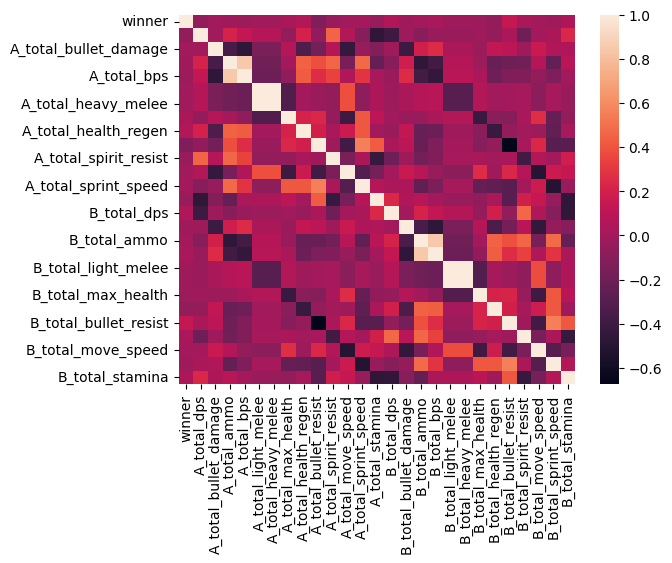

In [272]:
import seaborn as sns
to_corr = df[['winner'] + list(df.loc[:, 'A_total_dps':'B_total_stamina'].columns)]
sns.heatmap(to_corr.corr())

<Axes: >

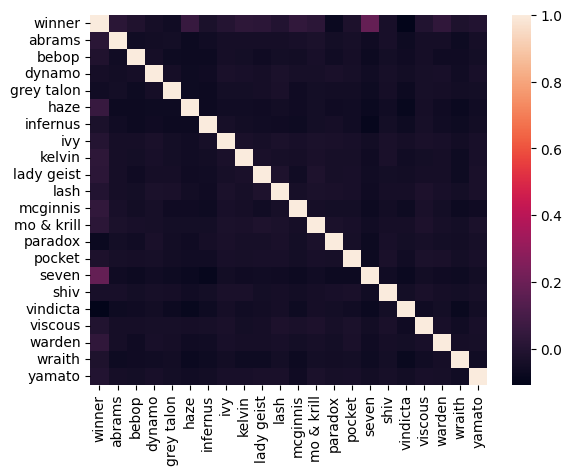

In [273]:
to_corr = df[['winner'] + list(heroes)]
sns.heatmap(to_corr.corr())

In [274]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [275]:
X, y = df.drop('winner', axis=1), df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
X_train.shape, X_test.shape

((20074, 49), (8604, 49))

In [276]:
RFC = RandomForestClassifier(n_estimators=250, max_depth=25)
RFC.fit(X_train, y_train)

y_pred_train = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.99985055295407, accuracy test: 0.5870525337052533


In [277]:
GBC = GradientBoostingClassifier(n_estimators=1500, max_depth=3)
GBC.fit(X_train, y_train)

y_pred_train = GBC.predict(X_train)
y_pred_test = GBC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.7890804025107103, accuracy test: 0.5679916317991632


In [278]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.6075520573876656, accuracy test: 0.6059972105997211


In [235]:
A_team = ['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']
B_team = ['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']
heroes_stats_df = pd.read_csv('data/heroes_stats.csv')
heroes = heroes_stats_df['localized_name']

heroes_A = [input('enter amber heroes: ').lower().strip() for _ in range(6)]
heroes_B = [input('enter sapphire heroes: ').lower().strip() for _ in range(6)]

test_match = pd.read_csv('data/blank_sample.csv')
test_match.drop('matchid', axis=1, inplace=True)
test_match.drop('winner', axis=1, inplace=True)

for i in range(1, 7):
    test_match[f'hero_{i}_A'] = heroes_A[i - 1]
for i in range(1, 7):
    test_match[f'hero_{i}_B'] = heroes_B[i - 1]

test_match['A'] = test_match[A_team].values.tolist()
test_match['B'] = test_match[B_team].values.tolist()
for ch in ('A', 'B'):
    for i in range(1, 7):
        test_match.drop(f'hero_{i}_{ch}', axis=1, inplace=True)

test_match['A_synergy'] = test_match['A'].apply(synergy)
test_match['B_synergy'] = test_match['B'].apply(synergy)

test_match[A_team] = test_match['A'].tolist()
test_match[B_team] = test_match['B'].tolist()
test_match.drop(['A', 'B'], axis=1, inplace=True)

for hero in heroes:
    test_match[hero] = 0
    test_match[f'{hero}'] -= (test_match[A_team] == f'{hero}').any(axis=1)
    test_match[f'{hero}'] += (test_match[B_team] == f'{hero}').any(axis=1)

for ch in ('A', 'B'):
    for i in range(1, 7):
        test_match.drop(f'hero_{i}_{ch}', axis=1, inplace=True)

for ch in ('A', 'B'):
    for col in heroes_stats_df.columns[1:]:
        test_match[f'{ch}_total_{col}'] = 0

add_heroes_attributes(test_match)

,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,7.59249,7.731087,1,0,0,1,-1,1,0,0,-1,1,-1,0,0,0,1,-1,0,-1,0,1,-1,400.0,63.1,146.0,34.12,384.0,708.0,3350.0,11.0,0.0,25.0,42.5,1.0,17.0,376.0,60.28,163.0,37.51,378.0,696.0,3425.0,10.5,8.0,15.0,40.0,1.0,18.0


In [241]:
test_match_scaled = scaler.transform(test_match)
res = logreg.predict(test_match_scaled)
if res == 1:
    print(f'the sapphire flame: {logreg.predict_proba(test_match_scaled)[0][1]* 100:.1f}%')
else:
    print(f'the amber hand: {logreg.predict_proba(test_match_scaled)[0][0]* 100:.1f}%')

the sapphire flame: 57.4%
